# Patching Away the Player Base?
## Does Patching the Game affect the Player Base of Video Games?

By TJ Laryea IV <br>
December 11th, 2023

Video games are susceptible to bugs, broken mechanics and characters, the natural remedy to these problems is for developers to patch them. Patching within competitive video games is the process of "fixing" the problems within a game. This is usually done by either "buffing" an item which means increasing its power and competitive viability or "nerfing items which means decreasing its competitive viability in order to create a game where everything is on an equal playing field and one thing is not better or worse than other things. 

Most, if not all, gamers want their competitive games to be balanced, but is it possible developers go too far with patching? Can too frequent of patching or patching things players love lead to a drop in the amount of players who are willing to play the game? In this report, I will uncover the truth and try to explain the balance of how much patching is acceptable in order to keep players happy and playing the games.

In order to perform this analysis, I will need to locate and store the numerous amounts of player data that come with all of these games. One limitation to this analysis is the fact that I am only able to analyze the PC playerbases, as data on console player data numbers is extremely difficult to come by and is often hidden by the major companies in Microsoft and Sony.

The games I will be analyzing in this study are Valorant, Tom Clancy's Rainbow Six Siege, and Apex Legends. These three are some of the most competitive games in recent years and are subject to patching and balancing. For each game, I will be going through the patch notes by the developers and finding the months in which they occurred and giving each month a number, with "0" meaning no patch and a "1" indicating there was a patch within that month.

My hypothesis for this study is that patching has a pretty negative effect on the player count within games. From my own personal experience with playing games, I have found that when developers constantly make changes to the game, whether they be buffs (improving their competitive nature) to weaker things or significant nerfs (weakening their competitive nature), overall it can leave some players feeling jaded about the game and more often than not leaving the game entirely for a period of time. <hr>

In [1]:
import pandas as pd
import bs4 
import requests as rq
import numpy as np
from datetime import datetime as dt
from scipy import stats
from matplotlib import pyplot as plt

For this analysis I used a plethora of Python packages that allow me to do many things from visualizing the data all the way to performing some statistical analysis.

## Loading In the Data & Data Cleaning
For all of the data sets I found, I had to go to various websites (Steamcounts, Steamcharts) and request the HTML content from the page. I then took the content from the websites and placed them into dataframes for me to analyze. For each game I exported the Pandas Dataframe as a CSV file in order for me to manually add in the Patch number.

To find the patches I had to go to the games various websites and sort through their patch notes. For what I considered a patch in this report is anything that changes the competitive nature within a game. (ex. Changing Character, Weapons, Maps). Things that patch bugs or improve the quality of life Were not counted as patches within the games.

<a href="https://www.ubisoft.com/en-us/game/rainbow-six/siege/news-updates?category=patch-notes">Rainbow Six Patch Notes</a><br>
<a href = "https://playvalorant.com/en-gb/news/tags/patch-notes/"> Valorant Patch Notes </a><br>
<a href = "https://www.ea.com/games/apex-legends/news#game-updates"> Apex Legends Patch Notes </a>

For a couple of the games, they released earlier on consoles so there are some empty months in the dataframes but the game technically was not released. For the sake, of having an accurate representation of my data, I decided to remove these empty months from the dataframe as to not skew the mean out of proportion.

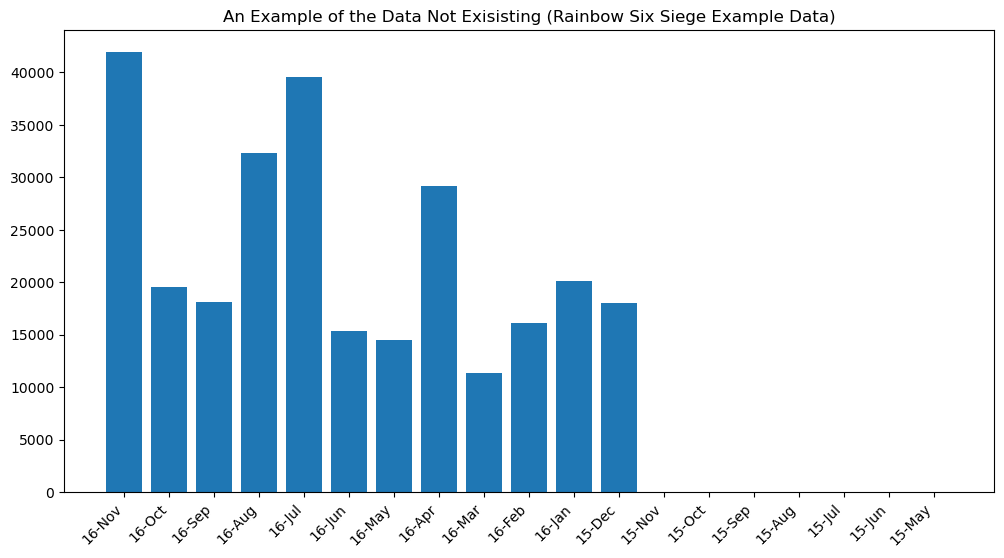

In [36]:
r6Example = pd.read_csv("r6Example.csv")

fig0, ax0 = plt.subplots()
ax0.bar(r6Example["Month"], r6Example["Peak"])
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha = "right")
ax0.set_title("An Example of the Data Not Exisisting (Rainbow Six Siege Example Data)")

plt.show()

## Rainbow Six Siege Data

<img src = "https://xxboxnews.blob.core.windows.net/prod/sites/2/2021/03/Tom-Clancys-Rainbow-Six-Siege-Ultimate-Edition.jpg">

<h4 style = "text-align: center "> An Image of Rainbow Six Siege Operators </h4>

In [2]:
r6_steam = rq.get("https://steamcharts.com/app/359550").content
df_list = pd.read_html(r6_steam)
r6PlayerData = df_list[-1]
r6PlayerData.to_csv('r6PlayerData.csv', index=False)

In [3]:
r6Patch = pd.read_csv('r6PlayerData_ACTUAL.csv')
r6Patch.head()
r6Patch['Months'] = [dt.strptime(x, '%b-%y') for x in r6Patch['Month']]
r6PlayerSort = pd.DataFrame(r6Patch.sort_values("Months", ascending = True))
r6PlayerSort.head()

,Month,Gain,% Gain,Peak Players,Patch,Months
75,Aug-17,5545,19.54%,73641,1,2017-08-01
74,Sep-17,2526,7.45%,69988,0,2017-09-01
73,Oct-17,-4830,-13.25%,59895,1,2017-10-01
72,Nov-17,9865,31.20%,99110,0,2017-11-01
71,Dec-17,17928,43.22%,100433,0,2017-12-01


The data came in reverse order so I had to use the python module called StripTime in order to add a timestamp to the data and then reverse it using the sort value method in Pandas. I had to do this for each dataset. 

In [4]:
r60 = r6PlayerSort[r6PlayerSort["Patch"] == 0]
# Separating the dataframe into months without patches and months with patches

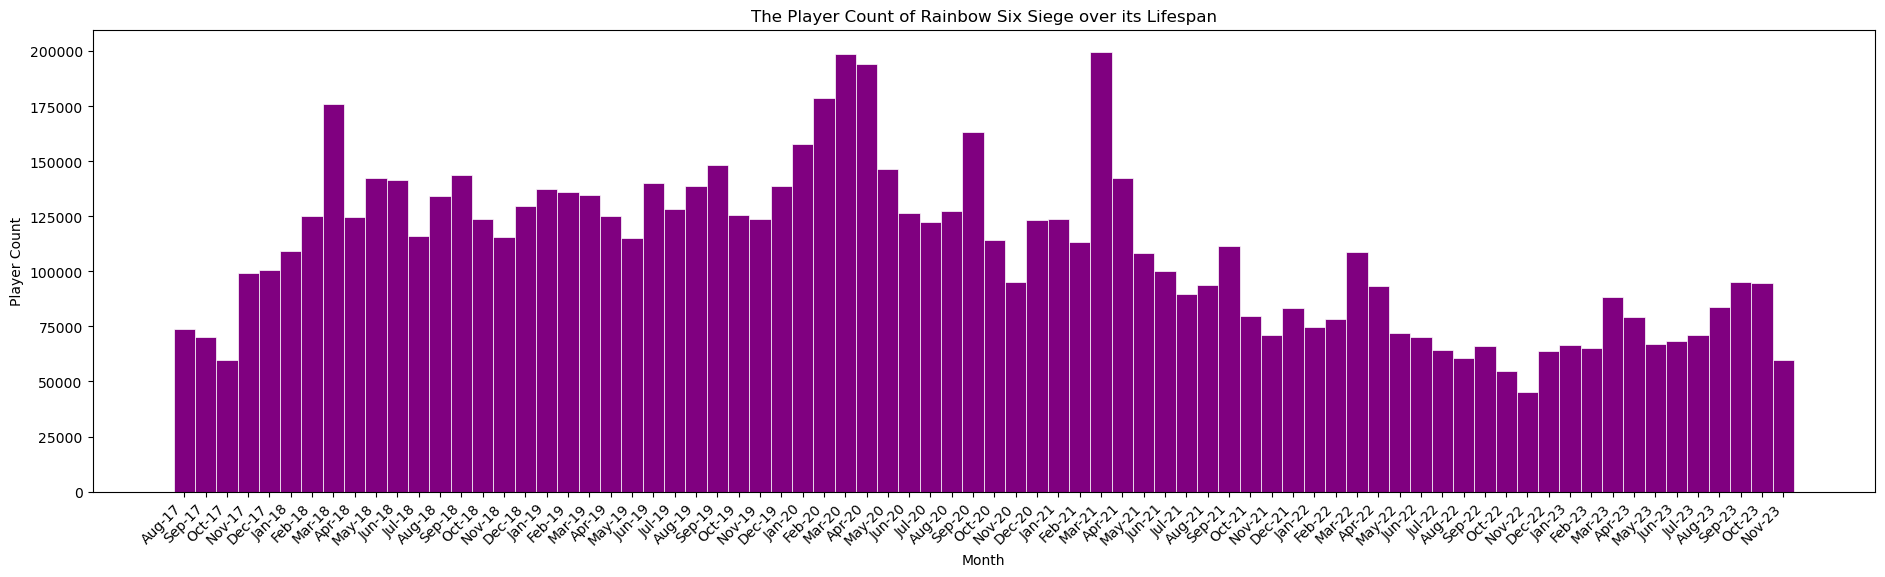

In [5]:
fig1, ax1 = plt.subplots()
ax1.bar(r6PlayerSort["Month"], r6PlayerSort["Peak Players"], width=1, edgecolor="white", linewidth=0.5, color = "Purple")
plt.gcf().set_size_inches(23, 6)
plt.xticks(rotation=45, ha = "right")
# Creating the figure and seeting up the x label

ax1.set_title("The Player Count of Rainbow Six Siege over its Lifespan")
ax1.set_xlabel('Month')
ax1.set_ylabel('Player Count')

plt.show()
# This is the full dataset

This initial graph is showing us the player count of Rainbow Six Siege over its entire lifespan on Steam.

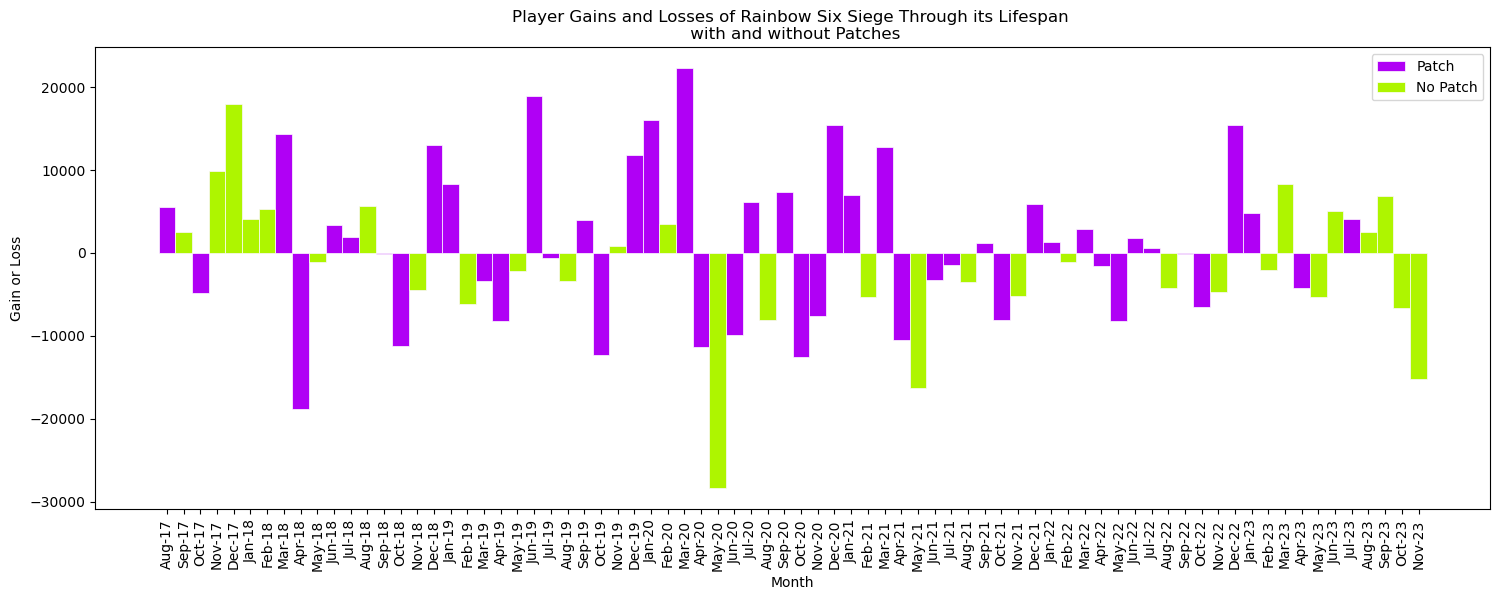

In [6]:
fig2, ax2 = plt.subplots()
ax2.bar(r6PlayerSort["Month"], r6PlayerSort["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#B000F5", label = "Patch")
ax2.bar(r60["Month"], r60["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#AEF500", label = "No Patch")
# Creating the bar plots with Month as the X and the Gain variable as the Y

plt.gcf().set_size_inches(18, 6)
plt.xticks(rotation=90, ha="center")  
# Setting the size of the chart and rotating the x label names and location
ax2.set_title("Player Gains and Losses of Rainbow Six Siege Through its Lifespan \n with and without Patches")
ax2.set_xlabel('Month')
ax2.set_ylabel('Gain or Loss')
ax2.legend()

plt.show()


## Rainbow Six Siege Chart Data Breakdown
The data this shows us is that rainbow six siege is patched on a infrequent basis and whether or not a patch occurs does not seem to have a clear indicatior of overall player count. Which is why I will run an independent T Test to see just how significant a patch is to the overall player count. 

## Rainbow Six Siege Statistic Breakdown

In [7]:
r6Results = stats.ttest_ind(r6PlayerSort[r6PlayerSort['Patch'] == 0]['Gain'], 
                            r6PlayerSort[r6PlayerSort['Patch'] == 1]['Gain'])

In [8]:
print(r6Results.statistic)
print(r6Results.pvalue)

-1.4021066466104157
0.16506437595104406


This first set of T tests is testing the relationship between Gain and Patch, with an emphasis on when a patch is present versus when it is not. From the results, we can see that our p-value is less than .5 which means there is a strong chance there is a significant correlation between patching and player count. The result from this T Test is telling us that when there is  a patch we will see more significant increase in player count.

<hr>

## Valorant Data
Below is the data on the competitve game Valorant. <br>
<em> From e-Safety.Com: <br>
Valorant is an online multiplayer computer game, produced by Riot Games. It is a first-person shooter game, consisting of two teams of five, where one team attacks and the other defends. Players control characters known as 'agents', who all have different abilities to use during gameplay.
</em>
<br>


Valorant is a very popular game garnering well over 1 million players and since it is a First-Person Shooter (FPS) it is subject to countless balancing changes in order to keep the game fun and fair.

<img src ="https://www.dexerto.com/cdn-cgi/image/width=3840,quality=75,format=auto/https://editors.dexerto.com/wp-content/uploads/2022/05/20/Valorant-series.jpg">

<h3 style = "text-align:center"> An Image of Valorant Agents </h3>

In [9]:
valorant_tracker = rq.get("https://tracker.gg/valorant/population").content

In [10]:
df_list4 = pd.read_html(valorant_tracker)
valorantPlayerData = df_list4[0]
valorantPlayerData.head()
valorantPlayerData.to_csv('valorantPlayerData.csv', index=False)

In [11]:
valorantPatch = pd.read_csv('valorantPlayerData_Update.csv')
valorantPatch.head()
valorantPatch['Months'] = [dt.strptime(x, '%y-%b') for x in valorantPatch['Date']]
valorantPlayerSort = pd.DataFrame(valorantPatch.sort_values("Months", ascending = True))

In [12]:
valorant0 = valorantPlayerSort[valorantPlayerSort["Patch"] == 0]

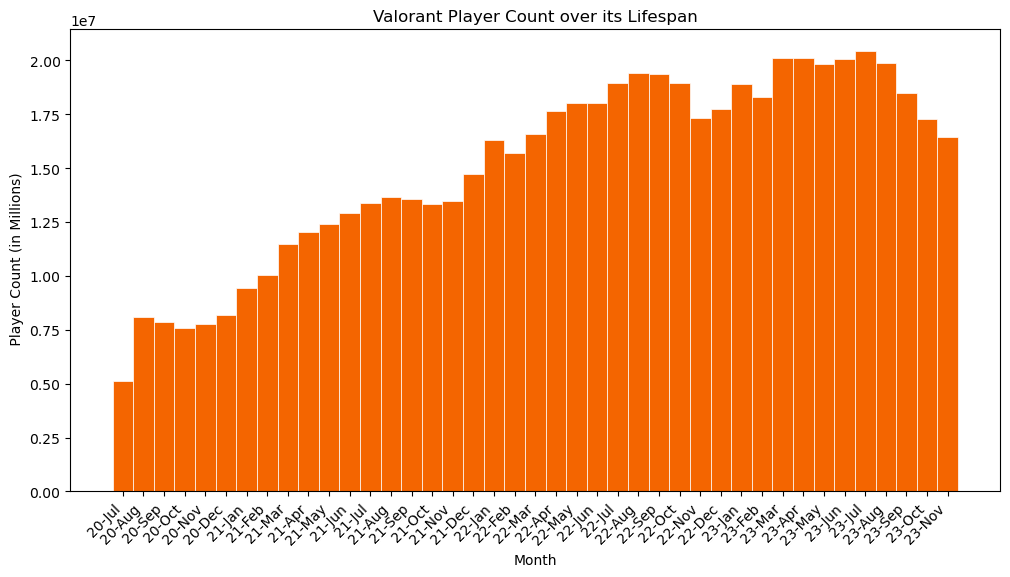

In [13]:
fig3, ax3 = plt.subplots()
ax3.bar(valorantPlayerSort["Date"], valorantPlayerSort["Players Count"], width=1, edgecolor="white", linewidth=0.5, color = "#F46500")
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha="right")

ax3.set_title("Valorant Player Count over its Lifespan")
ax3.set_ylabel(" Player Count (in Millions)")
ax3.set_xlabel("Month")
plt.show()

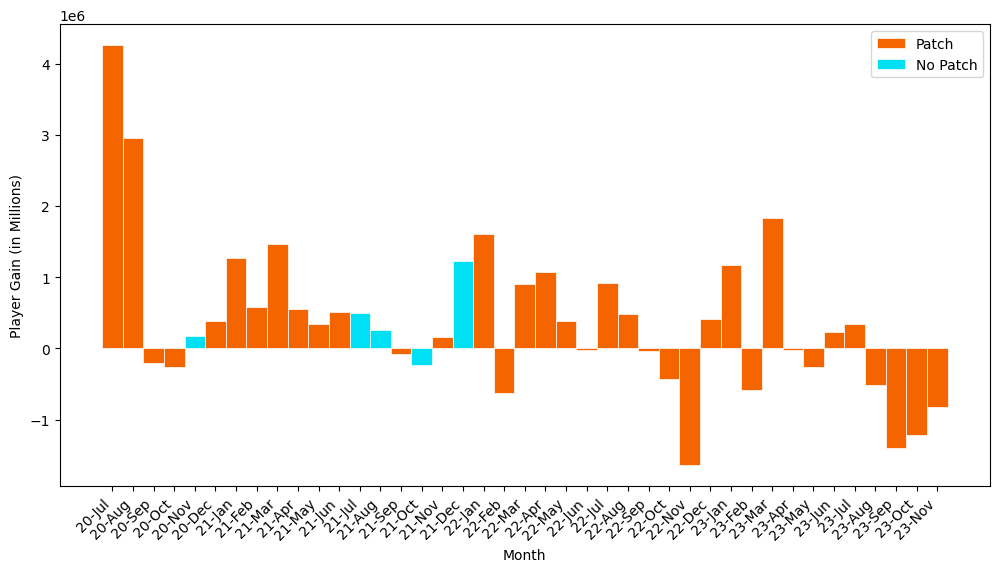

In [14]:
fig4, ax4 = plt.subplots()
ax4.bar(valorantPlayerSort["Date"], valorantPlayerSort["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#F46500", label = "Patch")
ax4.bar(valorant0["Date"], valorant0["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#00E0F5", label = "No Patch")

ax4.set_xlabel("Month")
ax4.set_ylabel("Player Gain (in Millions)")
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha="right")  
ax4.legend()
plt.show()

The data this shows us is that Valorant is patched often specifically 87% of the time (36/41 months). For the most part this data is showing us that more often that not patches within Valorant lead to a gain in players and it is only more recently in the last four months has there been a sharp decline in players playing the game. This makes sense as in those patches the developers made significant changes to fan favorite things which turned players away <hr>

In [15]:
valorantResults = stats.ttest_ind(valorantPlayerSort[valorantPlayerSort['Patch'] == 0]['Gain'], 
                            valorantPlayerSort[valorantPlayerSort['Patch'] == 1]['Gain'])

print(valorantResults.statistic)
print(valorantResults.pvalue)

0.0010493603643952666
0.9991680810790108


This second set of T tests is testing the relationship between gain and patch, with an emphasis on when a patch is present versus when it is not. From the results, we can see that our p-value is higher than .5, which leads us to believe there is little correlation between how Gain performs when a patch is present and when a patch is not. There is one flaw in this analysis, however, as the sample size for months without a patch is significantly smaller than the data when a patch occurs.

## Apex Legends Data

Apex Legends is an online multiplayer battle royale game featuring squads of three players using pre-made characters with distinctive abilities, called "Legends", similar to those of hero shooters. Alternate modes have been introduced allowing for single and for two-player squads since the game's release.

<img src = "https://media.steelseriescdn.com/blog/posts/apex-legends-guide-tips-and-tricks/3b4965a458fb41958c17ebf4d79475f0.webp">

<h3 style = "text-align:center"> An Image of Apex Legends "Legends" </h3>

In [16]:
apex_steam = rq.get("https://steamcharts.com/app/1172470").content

In [17]:
df_list5 = pd.read_html(apex_steam)
apexPlayerData = df_list5[-1]
apexPlayerData
apexPlayerData.to_csv('apexPlayerData.csv', index=False)

In [18]:
apexPatch = pd.read_csv('apexPlayerData_Updated.csv')
apexPatch.head()

,Month,Avg. Players,Gain,% Gain,Peak Players,Patch
0,23-Nov,167296,-14125,-7.79%,438349,0
1,23-Oct,181420,-5074,-2.72%,435229,1
2,23-Sep,186494,-2397,-1.27%,452991,0
3,23-Aug,188892,22693,13.65%,451223,1
4,23-Jul,166199,-22902,-12.11%,349762,0


In [19]:
apexPatch['Months'] = [dt.strptime(x, '%y-%b') for x in apexPatch['Month']]
# Adding a new Table section that allows us to sort the values easier
apexPlayerSort = pd.DataFrame(apexPatch.sort_values("Months", ascending = True))
# Sorting the values in descending order based off the month and year
apex0 = apexPlayerSort[apexPlayerSort["Patch"]== 0]
# Sorting the data to only months without a patch
apex0.head()

,Month,Avg. Players,Gain,% Gain,Peak Players,Patch,Months
35,20-Dec,64470,-10488,-13.99%,112076,0,2020-12-01
34,21-Jan,71767,7297,11.32%,129928,0,2021-01-01
32,21-Mar,126121,5138,4.25%,228439,0,2021-03-01
31,21-Apr,124905,-1216,-0.96%,217728,0,2021-04-01
29,21-Jun,136440,-27798,-16.93%,266591,0,2021-06-01


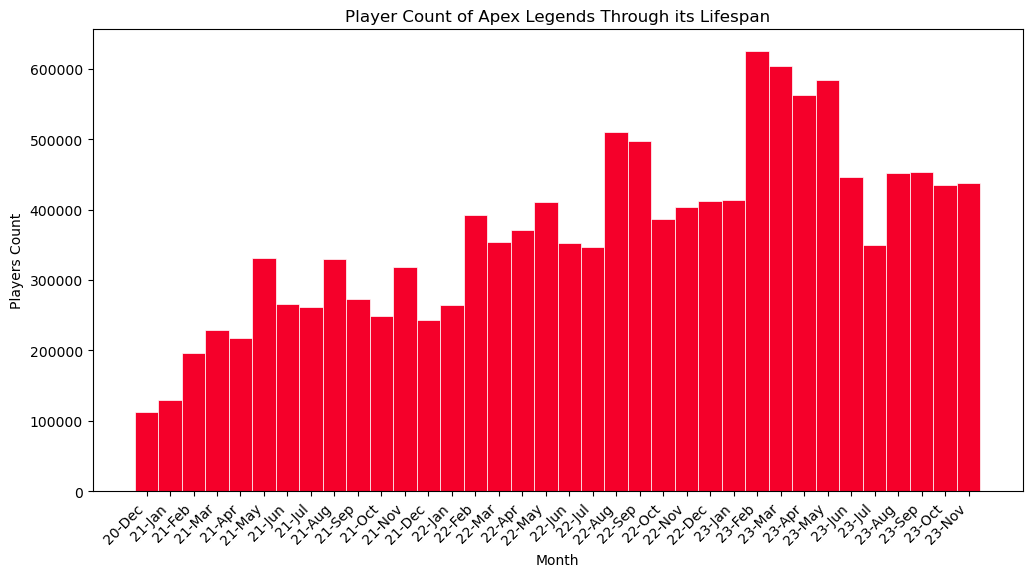

In [20]:
fig6, ax6 = plt.subplots()
ax6.bar(apexPlayerSort["Month"], apexPlayerSort["Peak Players"], width=1, edgecolor="white", linewidth=0.5, color = "#F5002A", label = "Patch")
# Plotting the apex player data
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha="right")  
# Setting the figure size, X label rotations and size.
ax6.set_title("Player Count of Apex Legends Through its Lifespan")
ax6.set_xlabel('Month')
ax6.set_ylabel('Players Count')

plt.show()

The above dataset is showing us the player count of Apex Legends over its Lifespan

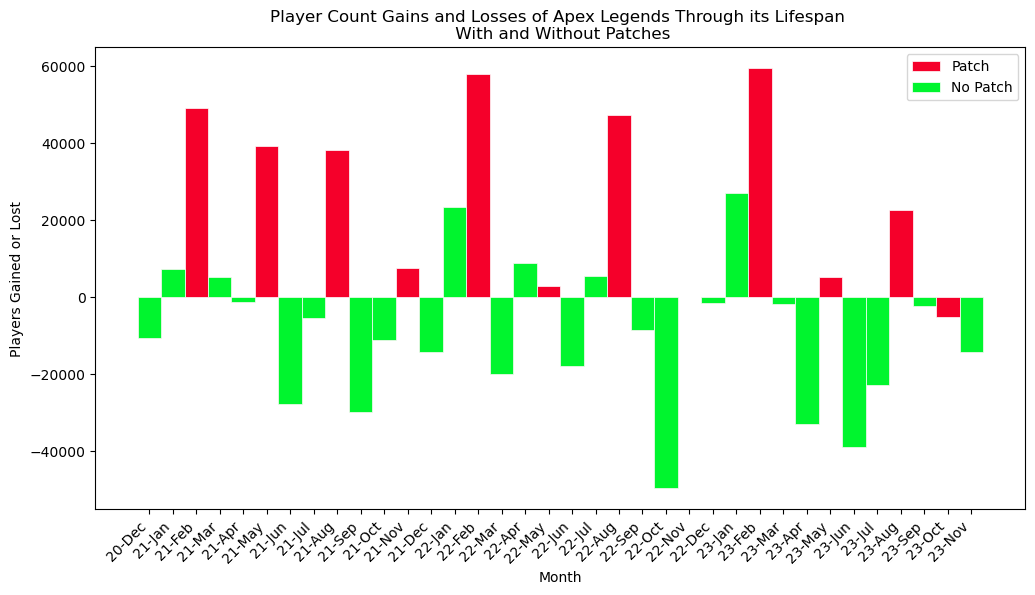

In [26]:
fig5, ax5 = plt.subplots()
ax5.bar(apexPlayerSort["Month"], apexPlayerSort["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#F5002A", label = "Patch")
ax5.bar(apex0["Month"], apex0["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#00F52E", label = "No Patch")


plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha="right")  

ax5.set_title("Player Count Gains and Losses of Apex Legends Through its Lifespan \n With and Without Patches")
ax5.set_xlabel('Month')
ax5.set_ylabel('Players Gained or Lost')
ax5.legend()

plt.show()

The chart above shows us that Apex Legends is not patched frequently and can go long stretches without patches. In Apex's case, it seems that player counts see a sharp decline in the months when patches are not made. However, this is not a clear picture as Apex releases their content on a seasonal model, which means every 3 months a new patch is made and a new character is released, which can help explain the sharp increases in player counts.

In [22]:
apexResults = stats.ttest_ind(apexPatch[apexPatch['Patch'] == 0]['Gain'], apexPatch[apexPatch['Patch'] == 1]['Gain'])

In [23]:
apexResults.statistic

-5.073022128463457

In [24]:
apexResults.pvalue

1.3813067890529608e-05

The results from this T-test show us that there is no correlation between patching and player count when it comes to Apex Legends, or the p-value is way over 0.5, which means there is no correlation. This makes sense, as, as mentioned earlier, the amount of time between patches and no patches is spaced out over a longer amount of time compared to Rainbow Six Siege.

## Conclusion

The results from this analysis were not what I expected. My hypothesis was wrong; from these data sets, we saw the majority of the data pointing to there being no real correlation between patching a game and player count. The only game with real significance was Rainbow Six Siege. One thing that may potentially be holding this data back is the amount of time the game has been released for. R6 has about 4 more years of data to pull from.

If I were to redo this study, I would pick different games with longer lifespans, or I'd just simply include more games, as this may give me a clearer picture of this phenomenon. However, there is one caveat when inspecting these older games. In the initial tests for this study, I used the game Counter Strike Global Offensive, or CSGO for short. When I started looking for patch notes, I found there was little documentation of this data, especially in the earlier years when developers posted their patch notes online, which had only become a recent process within competitive games. Knowing this made documenting the patches very difficult and ultimately led to my not using the dataset.

This study would also benefit from console player data. Playing games on a PC or console is a very different experience, so changes within the games may affect the player base differently, and having this data would allow me to get a clearer picture of how patches truly affect games.

All in all, when it comes to patching games and how often to patch games, I would be on the side of caution and avoid overpatching your game as well as underpatching your game and keep it more towards the center.